# What to Do?

The CEO of VirtuTel has come to you with a problem. Their customers are leaving them for competitors resulting in a loss of revenue. They would like to be able to predict which customers are at risk of leaving. They have provided you with a dataset of their customers and have asked you to build a model that can predict whether a customer will churn or not. Are you up for the challenge?

> #### **Tip:** Identify the Problem Type
> This is a binary classification problem, as we are trying to predict whether a customer will churn or not.  
This means that we will be using supervised learning techniques.

# How to Start
A general framework for a Binary Classification's task includes the following:

1. Exploratory Data Analysis (EDA)
2. Data Cleaning and Preprocessing
3. Modelling
4. Evaluation
5. Error Analysis

Optional steps to further improve the predictive ability of the machine learning model includes **Dimensionality Reduction**, **Handling Class Imbalance**, **Cross Validation**, **Feature Selection**, and **Hyperparameter Tuning**.

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import other libraries if needed

## Import Dataset

In [35]:
train = pd.read_csv("../data/customer_data.csv")

In [36]:
train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [37]:
train.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Column Descriptions

| Column Name | Description |
| --- | --- |
| CustomerID | A unique ID that identifies each customer.
| Count | A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
| Country | The country of the customer’s primary residence.
| State | The state of the customer’s primary residence.
| City | The city of the customer’s primary residence.
| Zip Code | The zip code of the customer’s primary residence.
| Lat Long | The combined latitude and longitude of the customer’s primary residence.
| Latitude | The latitude of the customer’s primary residence.
| Longitude | The longitude of the customer’s primary residence.
| Gender | The customer’s gender: Male, Female
| Senior Citizen | Indicates if the customer is 65 or older: Yes, No
| Partner | Indicate if the customer has a partner: Yes, No
| Dependents | Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
| Tenure Months | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
| Phone Service | Indicates if the customer subscribes to home phone service with the company: Yes, No
| Multiple Lines | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
| Internet Service | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
| Online Security | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
| Online Backup | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
| Device Protection | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
| Tech Support | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
| Streaming TV | Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
| Streaming Movies | Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
| Contract | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
| Paperless Billing | Indicates if the customer has chosen paperless billing: Yes, No
| Payment Method | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
| Monthly Charge | Indicates the customer’s current total monthly charge for all their services from the company.
| Total Charges | Indicates the customer’s total charges, calculated to the end of the quarter specified above.
| Churn Label | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
| Churn Value | 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
| Churn Score | A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
| CLTV | Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
| Churn Reason | A customer’s specific reason for leaving the company. Directly related to Churn Category.

## A. Data Understanding
The objective of this section is to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.

In [38]:
# Size of the data
print("Size of the data:", train.shape)

Size of the data: (7043, 33)


In [39]:
# Data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [40]:
# Number of unique values in each column
train.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [41]:
# Descriptive statistics for each column
train.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature.

In [42]:
# Check for missing values
train.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [43]:
# Check for duplicate rows
train.duplicated().sum()

0

In [44]:
# Check for outliers with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_grid(dataframe, n_cols=3, subplot_size=(5, 3)):
    """
    Plots a grid of boxplots for all numerical non-binary columns in a DataFrame.

    :param dataframe: pandas DataFrame to plot.
    :param n_cols: Number of columns in the grid.
    :param subplot_size: Size of each subplot (width, height).
    """
    # Identify numerical columns that are not binary (more than 2 unique values)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and dataframe[col].nunique() > 2]

    # Determine the grid size (number of rows and columns in the grid)
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Computes the required number of rows

    # Create a figure with subplots in a grid
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each column
        sns.boxplot(y=dataframe[col])
        plt.title(col)
    plt.tight_layout()  # Adjusts the subplots to fit in the figure area
    plt.show()


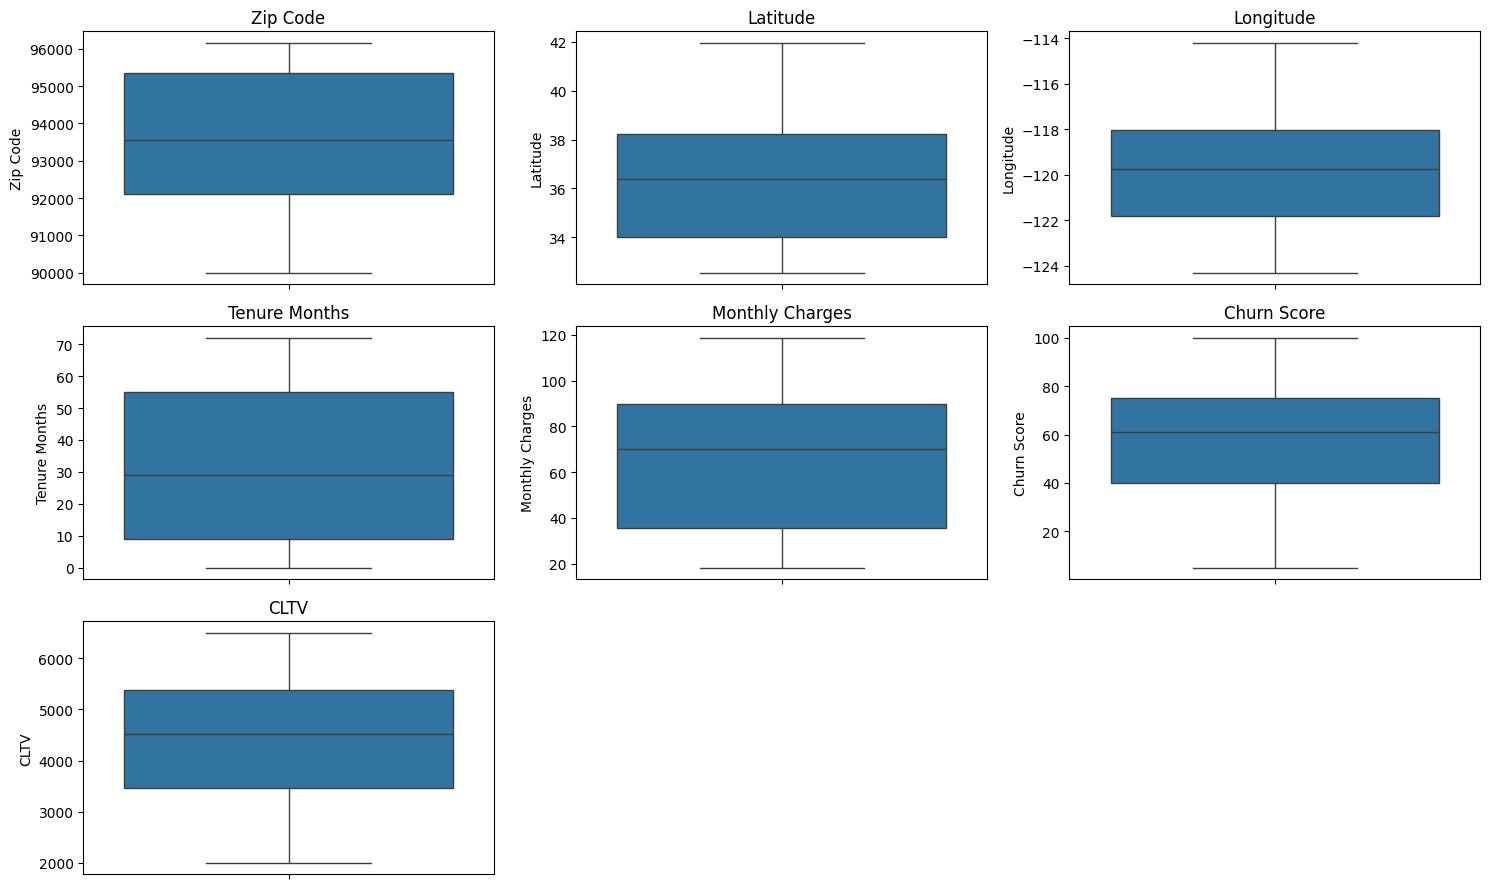

In [45]:
plot_boxplots_grid(train)

### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.

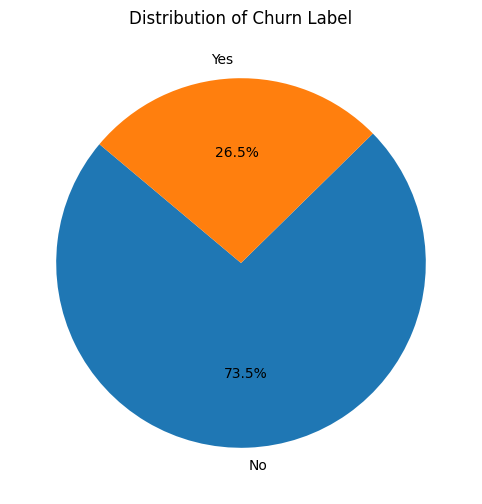

In [46]:
# Plot the distribution for target column
import matplotlib.pyplot as plt

def plot_churn_distribution(data, column='Churn Label'):
    """
    Plots the distribution of the churn label in a pie chart.

    :param data: DataFrame containing the customer data.
    :param column: Name of the column containing the churn label.
    """
    # Calculating the distribution
    churn_dist = data[column].value_counts()

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(churn_dist, labels=churn_dist.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Churn Label')
    plt.show()

# Testing the function with the customer data
plot_churn_distribution(train)

In [47]:
# Plot the distribution for each numerical columns based on the churn label

import seaborn as sns

def plot_numerical_distribution_by_churn(data, churn_column='Churn Label'):
    """
    Plots the distribution of each numerical column in the data, separated by churn label.

    :param data: DataFrame containing the customer data.
    :param churn_column: Name of the column containing the churn label.
    """
    # Identifying numerical columns
    numerical_columns = data.select_dtypes(include=['number']).columns

    # Number of rows and columns for the subplot
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols

    # Creating subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    # Plotting each numerical column
    for i, col in enumerate(numerical_columns):
        sns.histplot(data=data, x=col, hue=churn_column, ax=axes[i], kde=True, element='step')
        axes[i].set_title(f'Distribution of {col} by Churn Label')
        axes[i].set_ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()

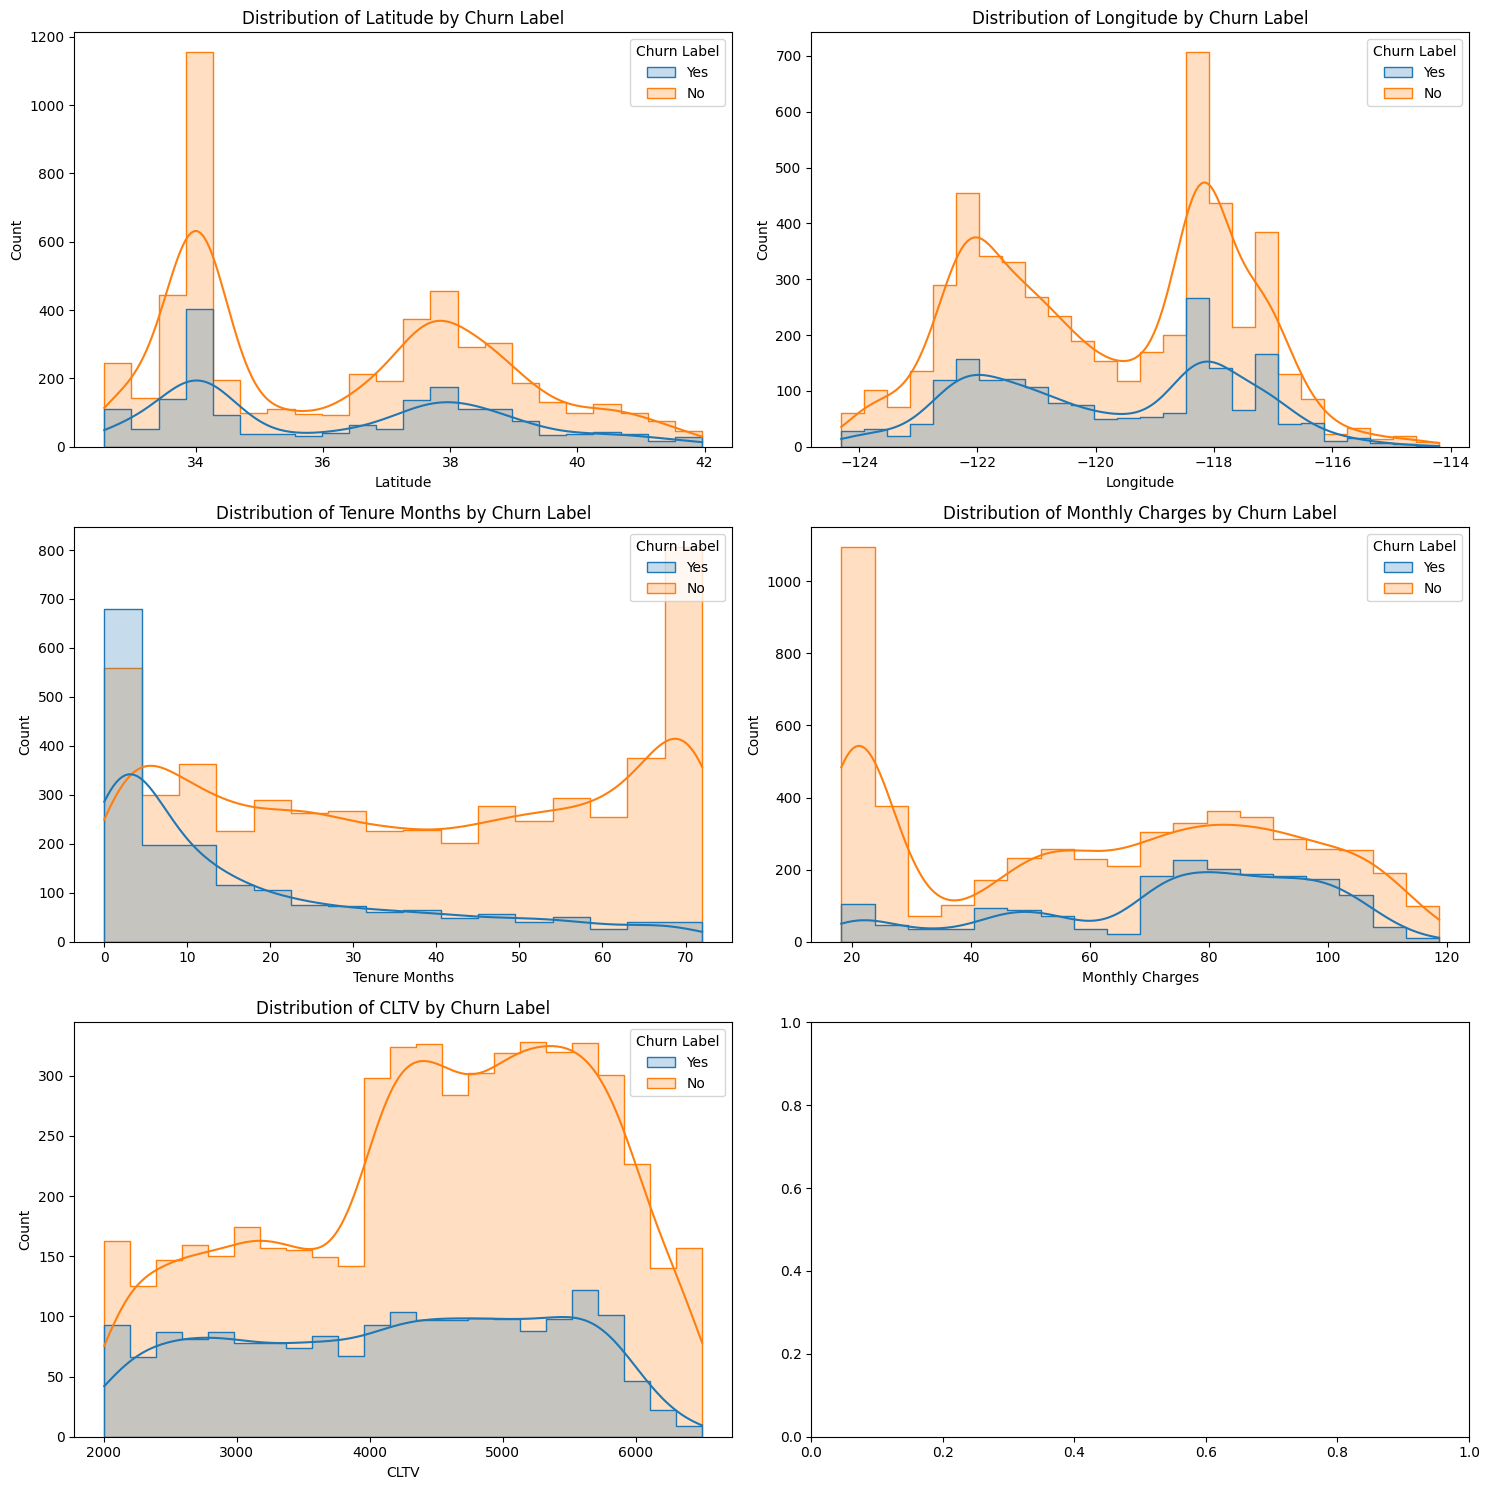

In [48]:
plot_numerical_distribution_by_churn(train[['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Label']])

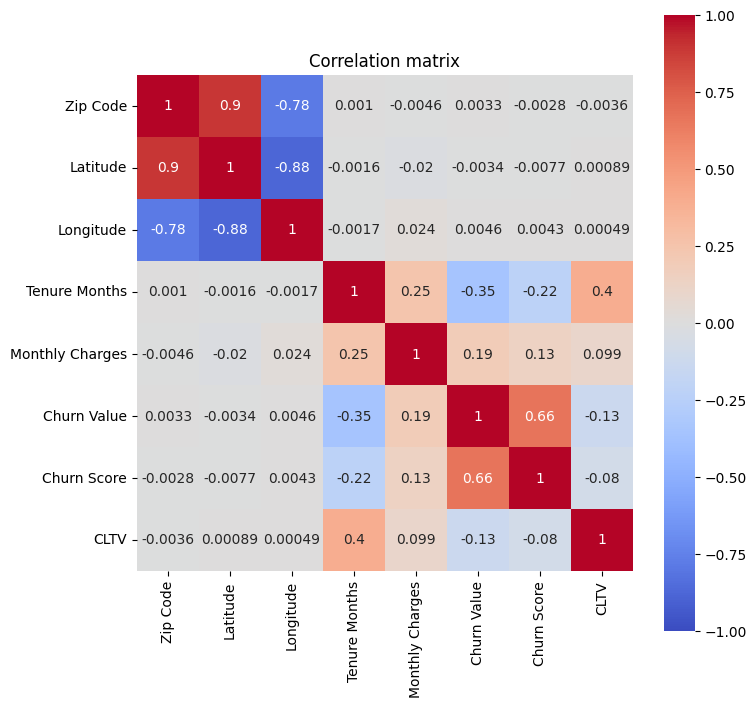

In [49]:
# Plot correlation matrix
corr = train.drop('Count', axis=1).corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**.

In [50]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train, test_size=0.2, random_state=42)

In [51]:
train_set.shape, val_set.shape

((5634, 33), (1409, 33))

# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

# A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Drop Columns
Some data features may not be of your interest, or may not be useful for the model. In this case, we will drop the following columns:
1. CustomerID - Because it is a unique identifier
2. Count - Because it is a value used in reporting/dashboarding to sum up the number of customers in a filtered set
3. All 'Churn' columns - Because it is directly related to Churn Category (That's cheating!)
4. All location features - For simplicity, we assume location does not affect churn

In [52]:
# Drop the columns

columns_to_drop = ['CustomerID', 'Count', 'Lat Long', 'Churn Reason', 'Churn Value', 'Churn Score', 'Zip Code', 'Latitude', 'Longitude', 'Country', 'State', 'City']

train_set.drop(columns=columns_to_drop, inplace=True)
val_set.drop(columns=columns_to_drop, inplace=True)

train_set.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
2142,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,No,5101
1623,Female,No,No,No,16,Yes,No,Fiber optic,No,Yes,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.20,1573.7,Yes,5497
6074,Female,No,No,No,32,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),104.05,3416.85,No,2335
1362,Female,Yes,Yes,No,24,No,No phone service,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.3,Yes,3843
6754,Female,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,406.05,No,2698


### II. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [53]:
# Thankfully, theres no missing values in the dataset!

### III. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Demonstrate feature engineering by creating a derived column in the following `FeatureCreator` class.

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureCreator(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        # Explore ways to create or transform new features!

        # Create a new feature called 'Total Charges' by multiplying 'Monthly Charges' and 'Tenure Months'
        X['Total Charges'] = X['Monthly Charges'] * X['Tenure Months']

        return X

# B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

6. **Handling Text and Unstructured Data:** If your dataset contains text or unstructured data, preprocessing may involve tokenization, stemming/lemmatization, and vectorization (e.g., TF-IDF or Word Embeddings) to convert text into numerical features.

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

Complete the following `FeatureScaler` class to scale your numerical data.

In [55]:
# Import necessary scalers
from sklearn.preprocessing import StandardScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        
        # Fit the scaler here

        self.numerical_cols = [col for col in X.columns if X[col].dtype != 'object' and X[col].nunique() > 2]
        self.sc = StandardScaler().fit(X[self.numerical_cols])
        
        return self
    
    def transform(self, X):
        
        # Perform scaling here

        X[self.numerical_cols] = self.sc.transform(X[self.numerical_cols])
        
        return X

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Binary Encoding:**

   - Binary encoding combines the advantages of label encoding and one-hot encoding.
   - It converts each category to a unique binary code (e.g., 000, 001, 010, 011).
   - Binary encoding reduces the dimensionality compared to one-hot encoding, making it more memory-efficient.
<br />
<br />
4. **Frequency Encoding:**

   - Frequency encoding replaces categories with their frequency of occurrence in the dataset.
   - It can be useful when the frequency of a category is informative for the prediction task.
<br />
<br />
5. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

Complete the following `FeatureEncoder` class to encode your categorical data.

In [56]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        X_encoded = X.copy()
        
        # Encode the categorical variables here
        
        cat_cols = X.select_dtypes(include=['object'])
        
        for col in cat_cols:
            
            # Check if the column is binary
            if X[col].nunique() == 2 and col != 'Gender':
                
                # Map the column with a dictionary
                X_encoded[col] = X_encoded[col].map({'Yes': 1, 'No': 0})
                
            else:
                # Perform one-hot encoding
                X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix=col)], axis=1)

                # Drop original categorical columns from DataFrame
                X_encoded.drop(col, axis=1, inplace=True)
        
        return X_encoded

# 4. Compile Preprocessing Pipeline

All of the preprocessing classes defined earlier will be compiled in this step.

In [57]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("featurecreator", FeatureCreator()),
                 ("scaler", FeatureScaler()),
                 ("encoder", FeatureEncoder())])

In [58]:
# Your code should work up until this point
train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

# 5. Modelling

Modelling is the process of building your own machine learning models to solve specific problems.

## A. Model Selection
Model selection is a process to find machine learning models to use for target feature prediction. Below are some things to consider when selecting machine learning model:

- **Tasks (e.g. classification, regression, clustering, etc)**

Some machine learning algorithms capable of only a certain tasks. So, it is important to know what tasks are you solving to choose the appropriate machine learning models.

- **Size and Quality of data**

Consider the amount of available data. Deep learning models, for instance, often require large datasets to perform well. For smaller datasets, simpler models may be more appropriate. Some models also more robust to noisy data than the others.

- **Interpretability vs Complexity**

Decide whether model interpretability is crucial for your problem. Simpler models like linear regression or decision trees are typically more interpretable than complex models like deep neural networks. Sometimes it is better to easily interpret your models than having a better accuracy on a complex models that's harder to explain.

- **Linearity of the Data**

It is important to know if a data is linearly separable or not. Linearly separable data means that the different classes of data points can be separated by a linear hyperplane (Ex: 2D data can be separated by a straight line). Non-linearly separable data means that the different classes of data points cannot be separated by a linear hyperplane. Linear models (e.g. linear regression, logistic regression) only works well in linear data. A non-linear dataset may require more complex models (e.g. tree-based models, support vector machines) that can handle non-linear patterns.

- **And many more...**

In [60]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Create the model
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=False)

ModuleNotFoundError: No module named 'catboost'

## B. Training the Model
In this process, you will train each of the selected model you choose in the previous using the training set. The model will learn the underlying patterns to differentiate between classes in the training process.

In [ ]:
# Split the data into features and target
X_train = train_set.drop('Churn Label', axis=1)
y_train = train_set['Churn Label']

X_val = val_set.drop('Churn Label', axis=1)
y_val = val_set['Churn Label']

# Train the model
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

## C. Evaluate the Model
Evaluate the model by predicting the target features of the validation set with the previously trained model. Model evaluation is an important step to know whether the model successfully generalizes well on the data or not.

In classification problems, generally there are 4 metrics to evaluate the model:

1. Accuracy: Total number of correct predictions divided by the total number of predictions.
2. Precision: The proportion of positive predictions that are actually correct.
3. Recall: The proportion of positive instances that are correctly predicted.
4. F1 Score: The harmonic mean of precision and recall.

These scale from 0 to 1, with 1 being the best possible score. It is important to note that there is a trade-off between precision and recall. Increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

In [ ]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# Make predictions
rf_pred = rf.predict(X_val)
xgb_pred = xgb.predict(X_val)
cat_pred = cat.predict(X_val)

# Print classification report for each model
print("Random Forest Classifier")
print(classification_report(y_val, rf_pred))
print()
print("XGBoost Classifier")
print(classification_report(y_val, xgb_pred))
print()
print("CatBoost Classifier")
print(classification_report(y_val, cat_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1009
           1       0.67      0.50      0.58       400

    accuracy                           0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409


XGBoost Classifier
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.66      0.54      0.60       400

    accuracy                           0.79      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.78      0.79      0.79      1409


CatBoost Classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1009
           1       0.70      0.57      0.63       400

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted

# Conclusion

Determine which model is better.